In [38]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [30]:
df = pd.read_csv('../data/mobilnet_v1_1.0_224_BENCHMARK_on_MCU.csv', delimiter=',')

In [22]:
df_selected = df[['board', 'optimization','cycles','duration_ms','frequency_MHz']]

In [23]:
print(df_selected)

               board optimization        cycles   duration_ms  frequency_MHz
0     NUCLEO-H743ZI2         time  5.550228e+07    115.629760          480.0
1   STM32F769I-DISCO     balanced  4.538967e+09  21013.736451          216.0
2   STM32F769I-DISCO          ram  4.538937e+09  21013.598891          216.0
3   STM32F769I-DISCO         time  4.544126e+09  21037.622025          216.0
4      STM32H735G-DK          ram  5.411541e+09   9839.165265          550.0
5      STM32H735G-DK         time  5.077250e+09   9231.363992          550.0
6   STM32H747I-DISCO     balanced  6.183920e+09  15459.800618          400.0
7   STM32H747I-DISCO          ram  6.260442e+09  15651.104287          400.0
8   STM32H747I-DISCO         time  4.685177e+09  11712.943215          400.0
9      STM32H7B3I-DK     balanced  9.744549e+09  34801.959984          280.0
10     STM32H7B3I-DK          ram  9.759763e+09  34856.294807          280.0
11     STM32H7B3I-DK         time  9.739436e+09  34783.698242          280.0

In [27]:
df_sorted = df_selected.sort_values(by='board')

In [28]:
print(df_sorted)

               board optimization        cycles   duration_ms  frequency_MHz
0     NUCLEO-H743ZI2         time  5.550228e+07    115.629760          480.0
15        STM32F469I          NaN           NaN           NaN            NaN
1   STM32F769I-DISCO     balanced  4.538967e+09  21013.736451          216.0
2   STM32F769I-DISCO          ram  4.538937e+09  21013.598891          216.0
3   STM32F769I-DISCO         time  4.544126e+09  21037.622025          216.0
4      STM32H735G-DK          ram  5.411541e+09   9839.165265          550.0
5      STM32H735G-DK         time  5.077250e+09   9231.363992          550.0
6   STM32H747I-DISCO     balanced  6.183920e+09  15459.800618          400.0
7   STM32H747I-DISCO          ram  6.260442e+09  15651.104287          400.0
8   STM32H747I-DISCO         time  4.685177e+09  11712.943215          400.0
9      STM32H7B3I-DK     balanced  9.744549e+09  34801.959984          280.0
10     STM32H7B3I-DK          ram  9.759763e+09  34856.294807          280.0

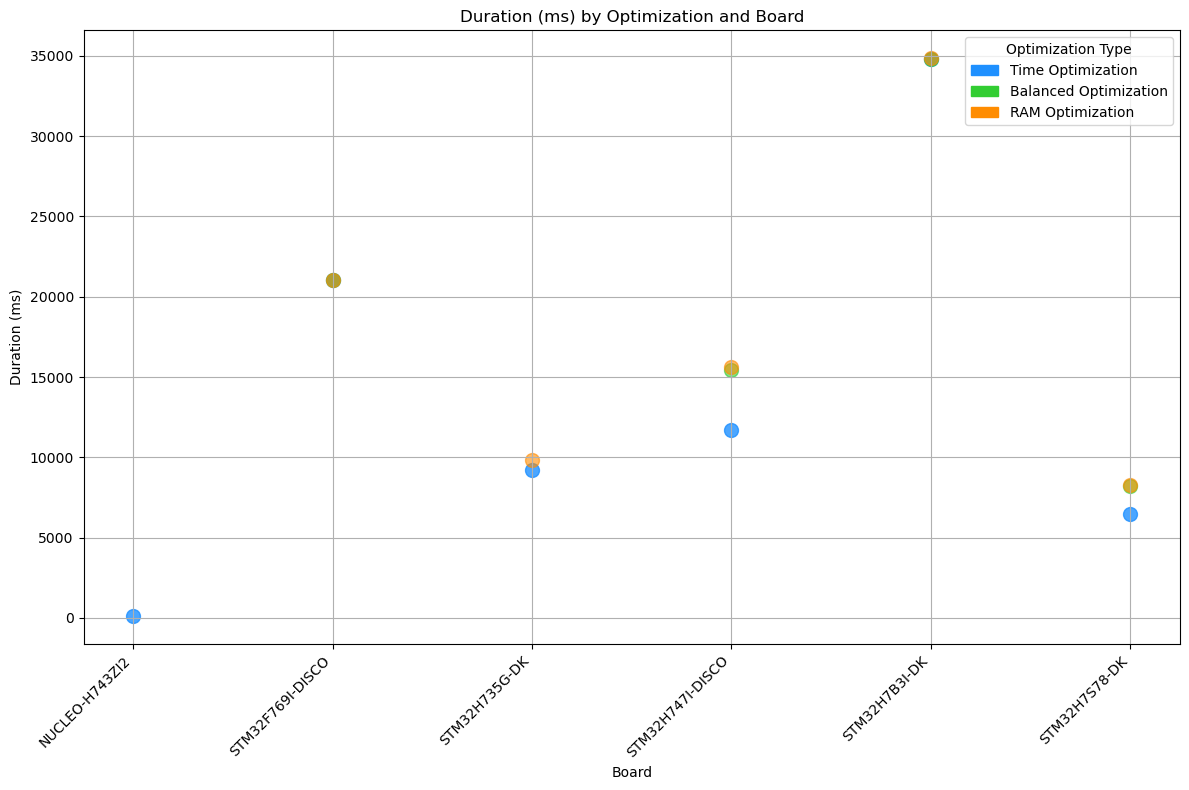

In [40]:
# Drop rows with missing 'optimization' values
df = df.dropna(subset=['optimization'])

# Filter for rows where optimization is 'time'
time_optimization_df = df[df['optimization'] == 'time']
bal_optimization_df = df[df['optimization'] == 'balanced']
ram_optimization_df = df[df['optimization'] == 'ram']

# Ensure that data is sorted by board
time_optimization_df = time_optimization_df.sort_values(by='board')
bal_optimization_df = bal_optimization_df.sort_values(by='board')
ram_optimization_df = ram_optimization_df.sort_values(by='board')

# Initialize a plot
plt.figure(figsize=(12, 8))

# Plot the data
for board in time_optimization_df['board'].unique():
    board_time_data = time_optimization_df[time_optimization_df['board'] == board]
    board_bal_data = bal_optimization_df[bal_optimization_df['board'] == board]
    board_ram_data = ram_optimization_df[ram_optimization_df['board'] == board]
    
    # Plot time optimization with brighter color and larger dots
    plt.scatter([board] * len(board_time_data), board_time_data['duration_ms'], label=None, color='dodgerblue', alpha=0.8, s=100)
    # Plot balanced optimization with natural color and larger dots
    plt.scatter([board] * len(board_bal_data), board_bal_data['duration_ms'], label=None, color='limegreen', alpha=0.6, s=100)
    # Plot ram optimization with darker color and larger dots
    plt.scatter([board] * len(board_ram_data), board_ram_data['duration_ms'], label=None, color='darkorange', alpha=0.6, s=100)

# Create custom legend patches
time_patch = mpatches.Patch(color='dodgerblue', label='Time Optimization')
bal_patch = mpatches.Patch(color='limegreen', label='Balanced Optimization')
ram_patch = mpatches.Patch(color='darkorange', label='RAM Optimization')

# Add legend with custom legend patches
plt.legend(handles=[time_patch, bal_patch, ram_patch], title='Optimization Type')

# Customize the plot
plt.title('Duration (ms) by Optimization and Board')
plt.xlabel('Board')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')  # Rotate board names on x-axis for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit x-axis labels
plt.show()
